In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Hyperparameters:
alpha = 0.8
gamma = 0.8
epsilon = 1
min_epsilon = 0.01
epsilon_decay_rate = 0.0002
episodes = 10000

In [3]:
# Calculating the q_table / Learning
env = gym.make('FrozenLake-v1')
q_table = np.zeros((env.observation_space.n, env.action_space.n)) #by default is_slippery=True

episode_reward = np.zeros(episodes)

for i in range(episodes):
    state = env.reset()[0]
    terminated = False
    truncated = False

    while(not terminated and not truncated):
        if random.random() < epsilon: #creates a number between 0 and 1 and checks to see if it explores or exploits.
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state, :])

        new_state, reward, terminated, truncated, _ = env.step(action)

        q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * np.max(q_table[new_state, :]) - q_table[state, action])
        state = new_state

    epsilon = max(epsilon - epsilon_decay_rate, min_epsilon)

    episode_reward[i] = reward

env.close()



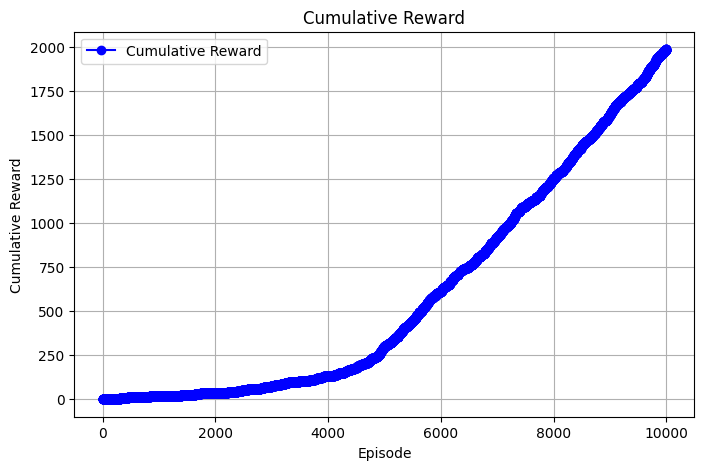

In [4]:
# Calculate the cumulative rewards. If this graph is linear at the end, then the algorithm is probably successful!
cumulative_reward = np.cumsum(episode_reward)

# Plot the cumulative graph
plt.figure(figsize=(8, 5))
plt.plot(cumulative_reward, marker='o', linestyle='-', color='b', label='Cumulative Reward')
plt.title("Cumulative Reward")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.grid(True)
plt.legend()
plt.show()

In [5]:
# Use the q_table to see a demo
env = gym.make('FrozenLake-v1', render_mode='human')

state = env.reset()[0]
terminated = False
truncated = False

while(not terminated and not truncated):
    action = np.argmax(q_table[state, :])
    new_state, reward, terminated, truncated, _ = env.step(action)
    state = new_state

env.close()

2024-12-31 20:24:21.929 python[16339:11322103] +[IMKClient subclass]: chose IMKClient_Modern
2024-12-31 20:24:21.929 python[16339:11322103] +[IMKInputSession subclass]: chose IMKInputSession_Modern
